## Setup: imports and global variables

Customize variables and run this cell first.

In [2]:
import os

import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import data_analysis as da

DATA_ROOT = os.path.join(os.environ['HOME'], 'rib-fracture', 'data')

DATASET_ROOT = os.path.join(DATA_ROOT, 'ribfrac')
ANALYSIS_ROOT = os.path.join(DATA_ROOT, 'analysis')

# default dataset directory tree
TRAIN_IMAGES = os.path.join(DATASET_ROOT, 'ribfrac-train-images')
TRAIN_LABELS = os.path.join(DATASET_ROOT, 'ribfrac-train-labels')
TRAIN_INFO = os.path.join(DATASET_ROOT, 'ribfrac-train-info.csv')

## Generate rib data

Generate data to be used later in the notebook. `rib_data` contains information about fracture types per scan.

In [3]:
rib_data = da.compute_rib_data([TRAIN_INFO])

In [4]:
nr_frac = {k: len(v) for k, v in rib_data.items()}
rib_frac_types = {name: 0 for name in da.LABEL_CODE.values()}
for k, v in rib_data.items():
    for frac_code in v:
        if frac_code != 0:  # ignore background
            rib_frac_types[da.LABEL_CODE[frac_code]] += 1
        
print('rib_data=', rib_data)
print('nr_frac=', nr_frac)
print('rib_frac_types=', rib_frac_types)

total_rib_frac = sum(rib_frac_types.values())
avg_frac = total_rib_frac/len(nr_frac)
print('average fractures', avg_frac)
print('total fractures',total_rib_frac)

rib_data= defaultdict(<class 'list'>, {'RibFrac1': [0, 2, 2], 'RibFrac2': [0, -1, -1, -1, 2, 2, 2, -1, -1, -1], 'RibFrac3': [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, 3], 'RibFrac4': [0, 2, 2, 1, 1, -1, 2], 'RibFrac5': [0, 2, 2], 'RibFrac6': [0, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1], 'RibFrac7': [0, 2, -1, 2, -1, -1, -1], 'RibFrac8': [0, 1, 1, 1, 4, 4, 2, -1, 2, 4, -1, -1], 'RibFrac9': [0, -1, -1, -1, -1, -1, 1, -1, -1, 1, 4, -1, -1, -1, 1, -1, -1], 'RibFrac10': [0, -1, -1, 3, -1, 3, 3, 1, 2], 'RibFrac11': [0, 3, 2], 'RibFrac12': [0, -1, -1, 2, 4, 4, 1], 'RibFrac13': [0, -1, -1, -1, 2, 1, -1, 1, -1, -1], 'RibFrac14': [0, -1, 1, -1, -1, -1, 2], 'RibFrac15': [0, -1, -1, -1, -1, -1, -1, -1, -1, -1], 'RibFrac16': [0, -1, -1, -1, -1, -1, 1, 3, 3, 1, 3, -1, -1, -1, -1, -1], 'RibFrac17': [0, 1, 1, 1, 1, 3, 1, -1, -1, -1, -1, 2, 3, -1, -1, -1, -1, -1, -1], 'RibFrac18': [0, -1, -1, -1, 1, 1, -1, -1, 3, 3], 'RibFrac19': [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, 2, 4, 

### Fracture type analysis

We plot the amount of fractures for each type.

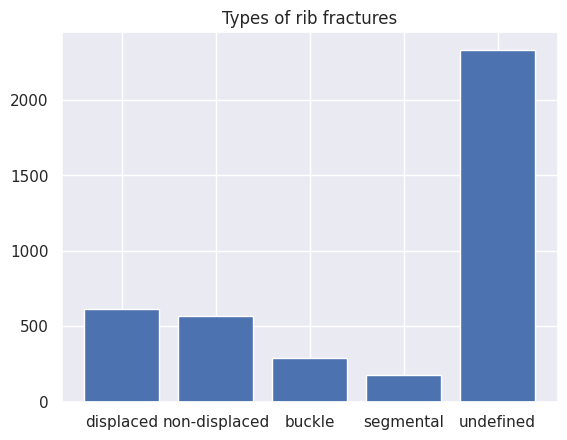

In [11]:
plt.bar(list(rib_frac_types.keys())[1:],list(rib_frac_types.values())[1:])
plt.title('Types of rib fractures')
plt.show()

## Fracture analysis

If present, loads existing analysis. Otherwise, fracture analysis is computed. It might take time to run (Estimated time: 30min). It generates 2 dataframes:
- `df_scan`: contains information about scan size
- `df_frac`: contains geometric information about fractures, including sizes and location distributions

In [12]:
df_scan, df_frac = da.compute_or_load_fracture_analysis(ANALYSIS_ROOT, TRAIN_LABELS, rib_data)

Loaded existing analysis


### Analize fracture data

We show numerical values and statistics of several useful parameters.

In [13]:
df_scan.head()

public_id  size_x  size_y  size_z
0   RibFrac29     512     512     373
1  RibFrac111     512     512     353
2  RibFrac151     512     512     365
3  RibFrac350     512     512     333
4  RibFrac132     512     512     387

In [14]:
df_frac.head()

public_id  frac_idx  frac_code frac_code_name  min_x  max_x  min_y  max_y  \
0   RibFrac29         1          3         buckle    210    248    393    414   
1   RibFrac29         2          1      displaced    209    240    396    414   
2   RibFrac29         3          1      displaced    220    256    401    418   
3   RibFrac29         4          1      displaced    239    277    405    423   
4  RibFrac111         1          2  non-displaced    159    182    128    159   

   min_z  max_z  ...  rel_max_z  rel_com_x  rel_com_y  rel_com_z  rel_size_x  \
0    220    240  ...   0.643432   0.451115   0.789787   0.619699    0.074219   
1    193    212  ...   0.568365   0.437403   0.791121   0.543508    0.060547   
2    177    196  ...   0.525469   0.462378   0.799819   0.499392    0.070312   
3    159    181  ...   0.485255   0.499157   0.808344   0.458326    0.074219   
4    154    171  ...   0.484419   0.332066   0.286144   0.461756    0.044922   

   rel_size_y  rel_size_z  rel_loc_x  rel_loc_y  rel_loc_z  
0    0.041016    0.053619   0.447266   0.788086   0.616622  
1    0.035156    0.050938   0.438477   0.791016   0.542895  
2    0.033203    0.050938   0.464844   0.799805   0.500000  
3    0.035156    0.058981   0.503906   0.808594   0.455764  
4    0.060547    0.048159   0.333008   0.280273   0.460340  

[5 rows x 39 columns]

In [15]:
df_scan.describe()

size_x  size_y      size_z
count   419.0   419.0  419.000000
mean    512.0   512.0  367.078759
std       0.0     0.0   51.726378
min     512.0   512.0  239.000000
25%     512.0   512.0  333.000000
50%     512.0   512.0  357.000000
75%     512.0   512.0  403.000000
max     512.0   512.0  721.000000

In [16]:
df_frac.describe()

frac_idx    frac_code        min_x        max_x        min_y  \
count  3969.000000  3969.000000  3969.000000  3969.000000  3969.000000   
mean      6.900731     0.255228   245.714538   272.827664   255.886117   
std       5.279031     1.618976    78.490351    78.472550   135.811224   
min       1.000000    -1.000000    75.000000    95.000000    15.000000   
25%       3.000000    -1.000000   183.000000   210.000000   116.000000   
50%       6.000000    -1.000000   228.000000   260.000000   310.000000   
75%       9.000000     2.000000   311.000000   341.000000   384.000000   
max      36.000000     4.000000   493.000000   506.000000   470.000000   

             max_y        min_z        max_z        volume        com_x  ...  \
count  3969.000000  3969.000000  3969.000000   3969.000000  3969.000000  ...   
mean    278.738977   199.358781   214.382212   4340.455278   259.278566  ...   
std     135.517387    74.454493    74.410559   5171.445018    78.294138  ...   
min      39.000000     0.000000    12.000000     78.000000    87.059023  ...   
25%     139.000000   146.000000   159.000000   1313.000000   195.496667  ...   
50%     341.000000   198.000000   215.000000   3245.000000   244.025157  ...   
75%     406.000000   248.000000   263.000000   5413.000000   325.540940  ...   
max     489.000000   527.000000   556.000000  88447.000000   497.295533  ...   

         rel_max_z    rel_com_x    rel_com_y    rel_com_z   rel_size_x  \
count  3969.000000  3969.000000  3969.000000  3969.000000  3969.000000   
mean      0.580753     0.506403     0.522015     0.560568     0.052955   
std       0.177342     0.152918     0.265207     0.177875     0.033030   
min       0.043011     0.170037     0.057606     0.019142     0.005859   
25%       0.453782     0.381829     0.248692     0.432958     0.031250   
50%       0.592075     0.476612     0.640791     0.570720     0.046875   
75%       0.720000     0.635822     0.774138     0.700732     0.064453   
max       0.998138     0.971280     0.936066     0.997229     0.324219   

        rel_size_y   rel_size_z    rel_loc_x    rel_loc_y    rel_loc_z  
count  3969.000000  3969.000000  3969.000000  3969.000000  3969.000000  
mean      0.044634     0.041221     0.506389     0.522095     0.560143  
std       0.026463     0.023867     0.152392     0.264639     0.177790  
min       0.001953     0.000000     0.169922     0.056641     0.021505  
25%       0.029297     0.027714     0.382812     0.250000     0.432166  
50%       0.039062     0.039387     0.476562     0.639648     0.570755  
75%       0.050781     0.049853     0.635742     0.772461     0.700456  
max       0.267578     0.316176     0.970703     0.936523     0.996437  

[8 rows x 37 columns]

In [17]:
df_frac.columns

Index(['public_id', 'frac_idx', 'frac_code', 'frac_code_name', 'min_x',
       'max_x', 'min_y', 'max_y', 'min_z', 'max_z', 'volume', 'com_x', 'com_y',
       'com_z', 'max2dsize_x', 'max2dsize_y', 'min2darea', 'max2darea',
       'size_x', 'loc_x', 'size_y', 'loc_y', 'size_z', 'loc_z', 'rel_min_x',
       'rel_min_y', 'rel_min_z', 'rel_max_x', 'rel_max_y', 'rel_max_z',
       'rel_com_x', 'rel_com_y', 'rel_com_z', 'rel_size_x', 'rel_size_y',
       'rel_size_z', 'rel_loc_x', 'rel_loc_y', 'rel_loc_z'],
      dtype='object')

### Amount of slices per scan

We compute the statistics of the number of slices per scan (`size_z` of slice).

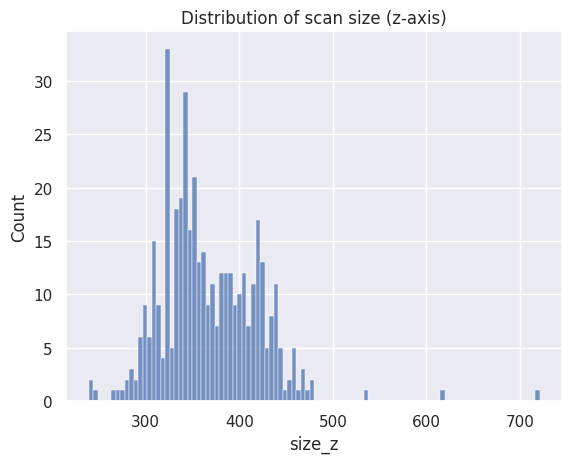

In [18]:
sns.histplot(data=df_scan, x='size_z', bins=100)
plt.title('Distribution of scan size (z-axis)')
plt.show()

### Select `patch_size` hyperparameter

We plot different sizes of 3d and 2d fracture regions to make a decision on which `patch_size` to use.

>Empirically, we choose `pathc_size=64` to be the best.

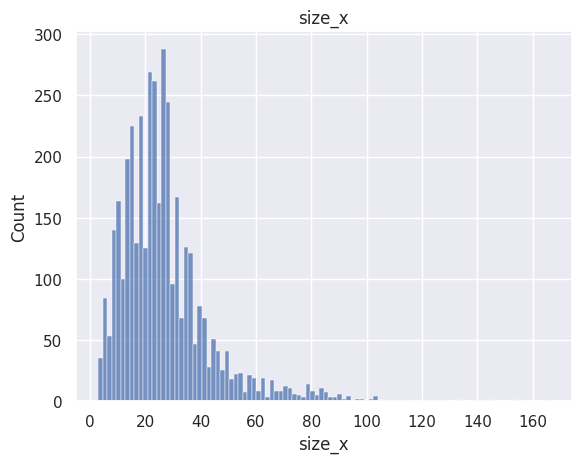

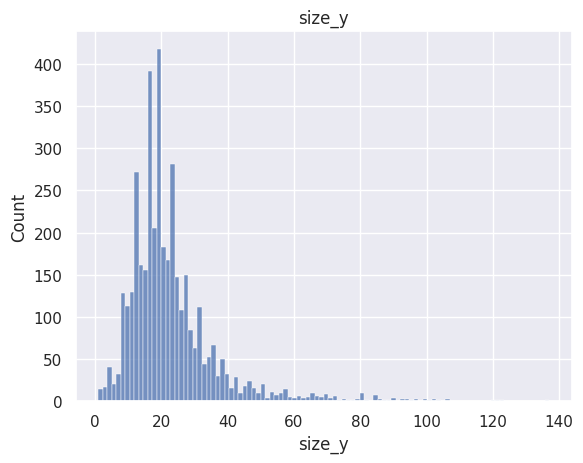

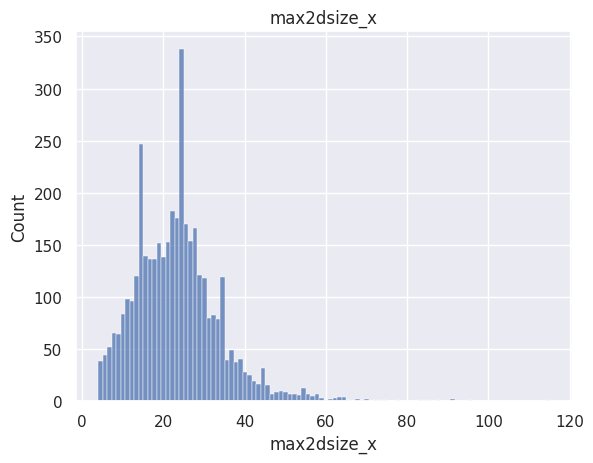

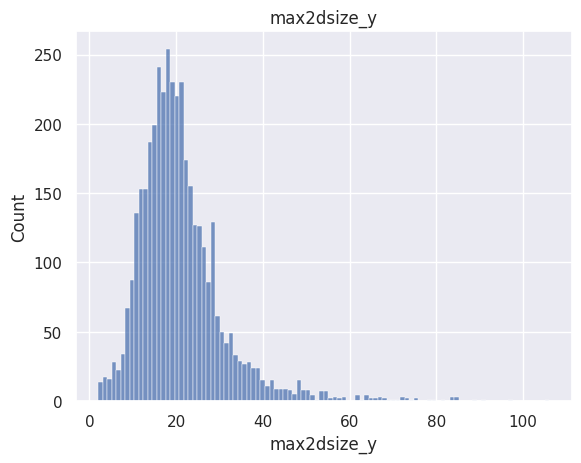

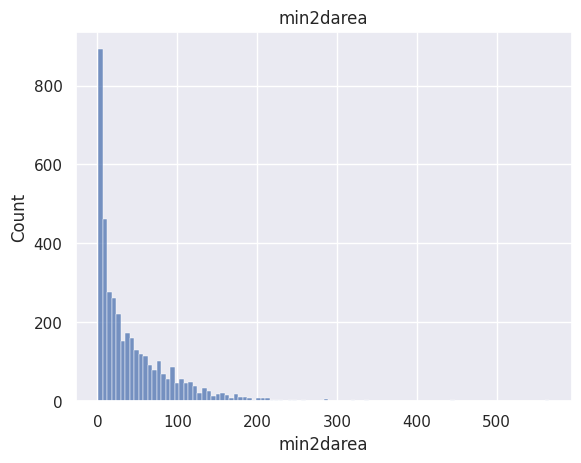

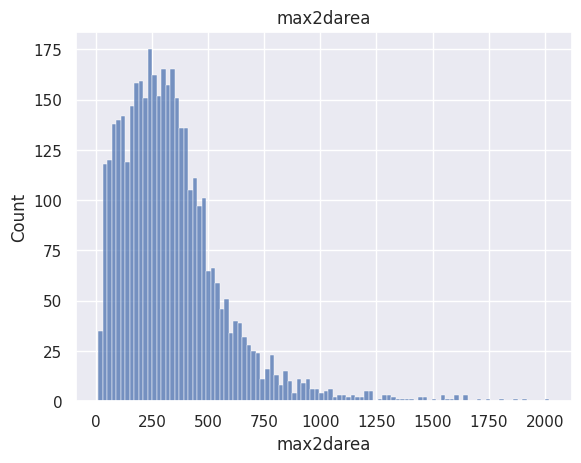

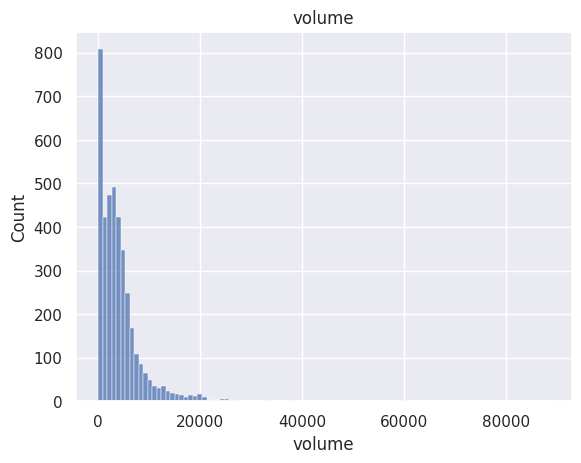

size_x       size_y  max2dsize_x  max2dsize_y    min2darea  \
count  3969.000000  3969.000000  3969.000000  3969.000000  3969.000000   
mean     27.113127    22.852860    23.520282    21.031746    44.424540   
std      16.911298    13.549083    10.720851    10.171216    52.342129   
min       3.000000     1.000000     4.000000     2.000000     1.000000   
25%      16.000000    15.000000    16.000000    15.000000     8.000000   
50%      24.000000    20.000000    23.000000    19.000000    26.000000   
75%      33.000000    26.000000    29.000000    25.000000    64.000000   
max     166.000000   137.000000   115.000000   106.000000   566.000000   

         max2darea        volume  
count  3969.000000   3969.000000  
mean    337.994205   4340.455278  
std     236.709749   5171.445018  
min      10.000000     78.000000  
25%     175.000000   1313.000000  
50%     300.000000   3245.000000  
75%     438.000000   5413.000000  
max    2019.000000  88447.000000

In [22]:
attrs = ['size_x', 'size_y', 'max2dsize_x', 'max2dsize_y', 'min2darea', 'max2darea', 'volume']
for attr in attrs:
    sns.histplot(df_frac[attr], bins=100)
    plt.title(attr)
    plt.show()
    
df_frac[attrs].describe()

### Select `fracture_proportion_in_patch` hyperparameter

We look into the smallest fracture region we can get to define the proportion of fractures in a patch. The aim of this is not to skip small fracture region when choosing a patch that contains a fracture.

The proportion is set as follows: $$\text{fracture\_proportion\_in\_patch}=\frac{\text{smallest\_area}}{\text{selected patch\_size}}$$

where the selected `patch_size=64` from last section.

>Empirically, we choose `smallest_area=40` (4 times the smallest) to be the best. Thus, `fracture_proportion_in_patch=0.01`.

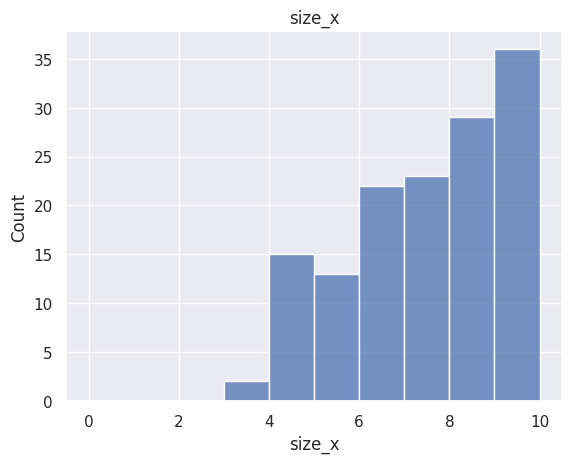

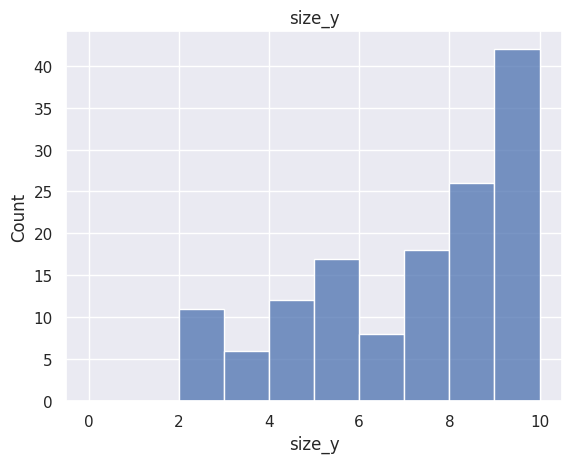

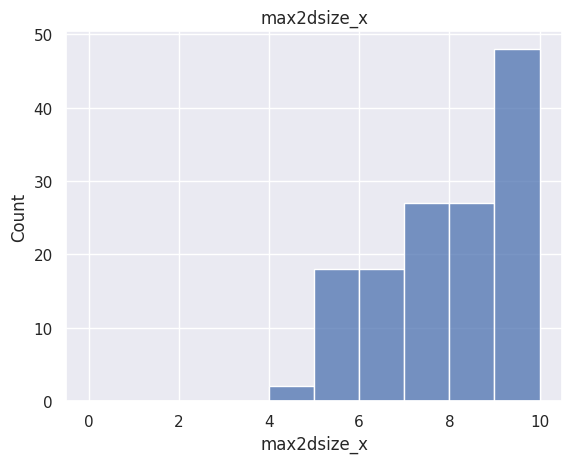

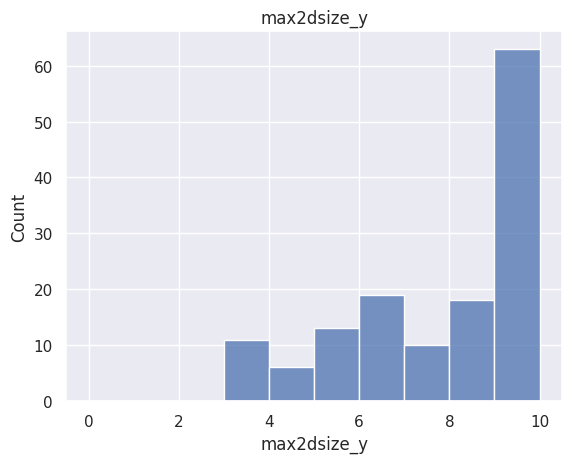

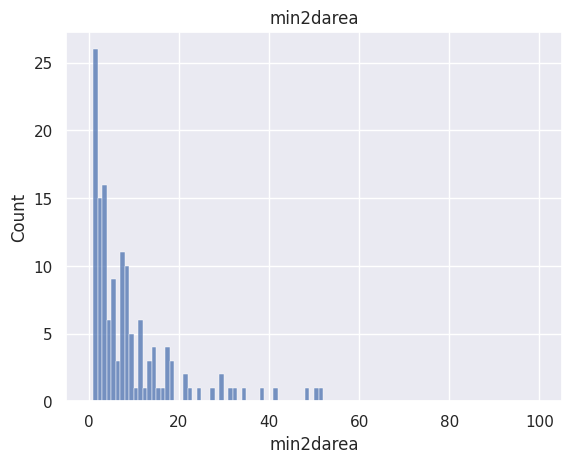

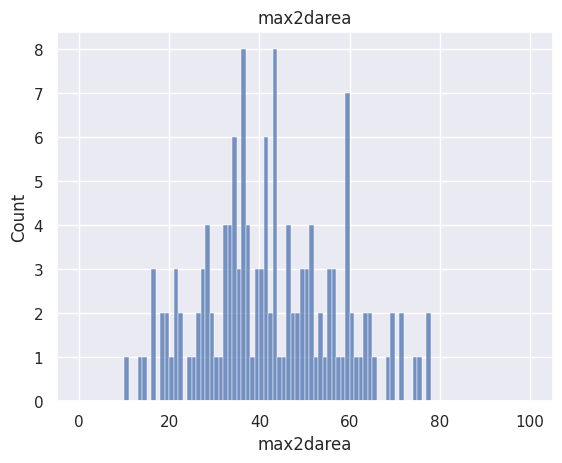

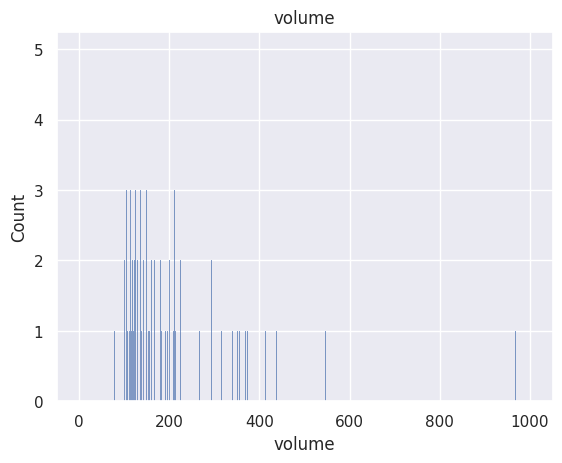

size_x      size_y  max2dsize_x  max2dsize_y   min2darea  \
count  140.000000  140.000000   140.000000   140.000000  140.000000   
mean     7.050000    6.721429     7.635714     7.485714    8.764286   
std      1.796579    2.366030     1.697271     2.232802   10.172336   
min      3.000000    2.000000     4.000000     3.000000    1.000000   
25%      6.000000    5.000000     6.000000     6.000000    2.000000   
50%      7.000000    7.000000     8.000000     8.000000    5.000000   
75%      9.000000    9.000000     9.000000     9.000000   11.000000   
max     10.000000   10.000000    10.000000    10.000000   51.000000   

        max2darea      volume  
count  140.000000  140.000000  
mean    42.164286  183.992857  
std     15.054630  107.976116  
min     10.000000   78.000000  
25%     32.750000  116.750000  
50%     41.000000  151.000000  
75%     53.000000  209.500000  
max     77.000000  967.000000

In [29]:
small_thr_size = 10
small_thr_area = small_thr_size**2
small_thr_volume = small_thr_size**3


attrs_size = ['size_x', 'size_y', 'max2dsize_x', 'max2dsize_y']
attrs_area = ['min2darea', 'max2darea']
attrs_volume = ['volume']

is_small_size = df_frac[attrs_size].max(axis=1) <= small_thr_size
is_small_area = df_frac[attrs_area].max(axis=1) <= small_thr_area
is_small_volume = df_frac[attrs_volume].max(axis=1) <= small_thr_volume
is_small = is_small_size & is_small_area & is_small_volume
df_frac_small = df_frac.loc[is_small, attrs_size + attrs_area + attrs_volume]

for attr_type, attrs, small_thr in zip(['size', 'area', 'volume'], [attrs_size, attrs_area, attrs_volume], [small_thr_size, small_thr_area, small_thr_volume]):
    for attr in attrs:
        sns.histplot(df_frac_small[attr], bins=small_thr, binrange=(0, small_thr))
        plt.title(attr)
        plt.show()
        
df_frac_small.describe()

### Selecting best `context_size` based on fracture height

We analyze the distribution of fracture heights to choose an optimal 3d `context_size`. We use absolute size because the context size will be taken in terms of pixels.

>Empirically, we choose `context_size=8` to be the best. (8 each size, 8x2+1=17 total patch height)

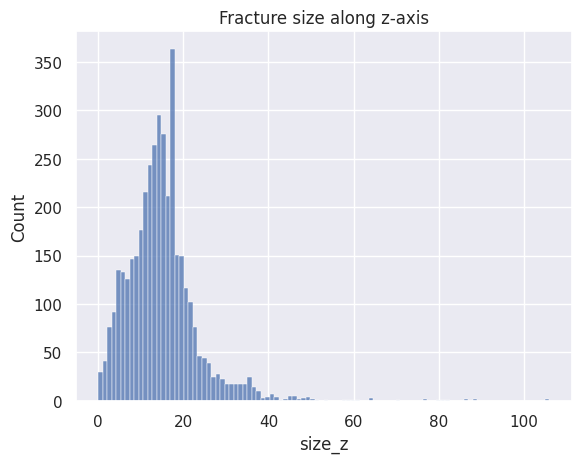

In [28]:
sns.histplot(df_frac['size_z'], bins=100)
plt.title('Fracture size along z-axis')
plt.show()

### Fracture location distribution

We plot the location of the fractures using absolute and relative coordinates.

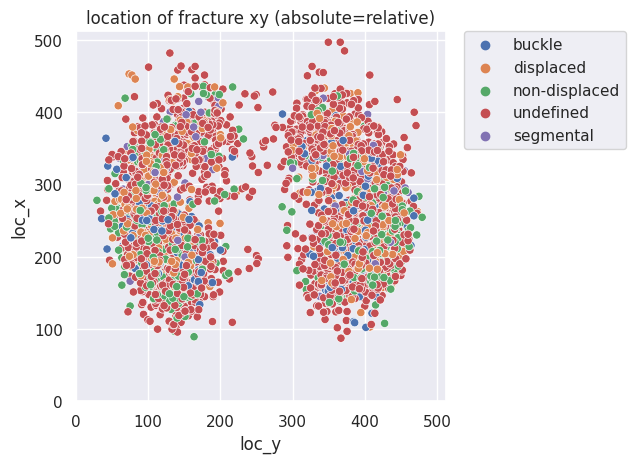

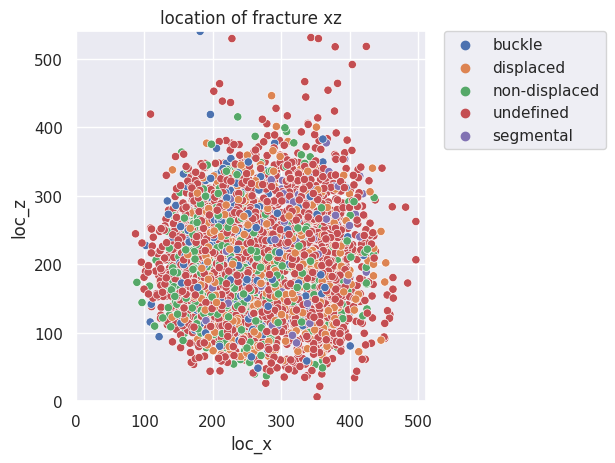

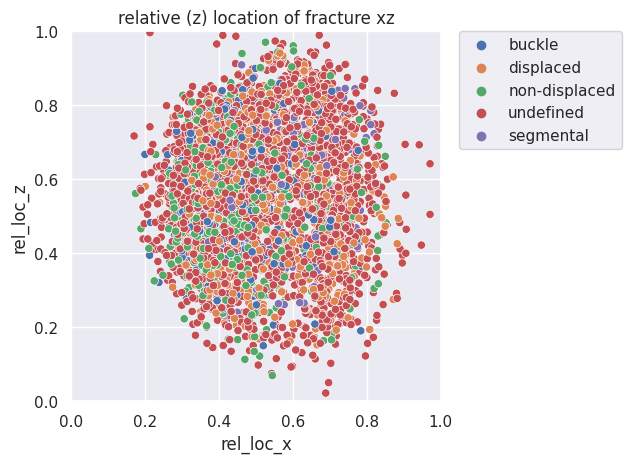

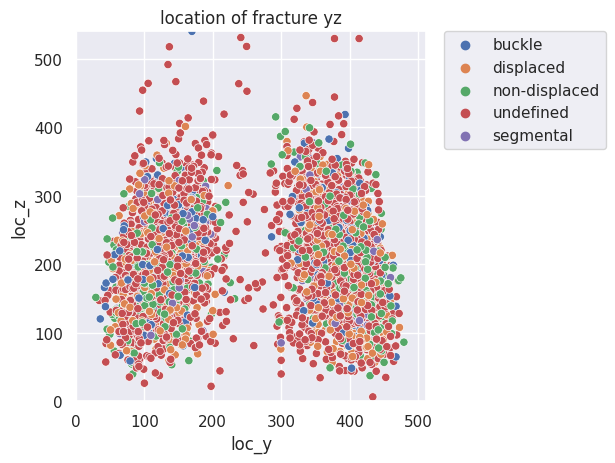

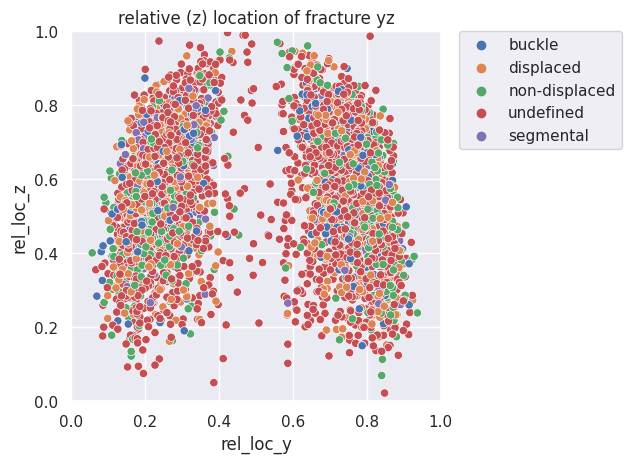

/gpfs/home2/scur0569/.venv/lib64/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


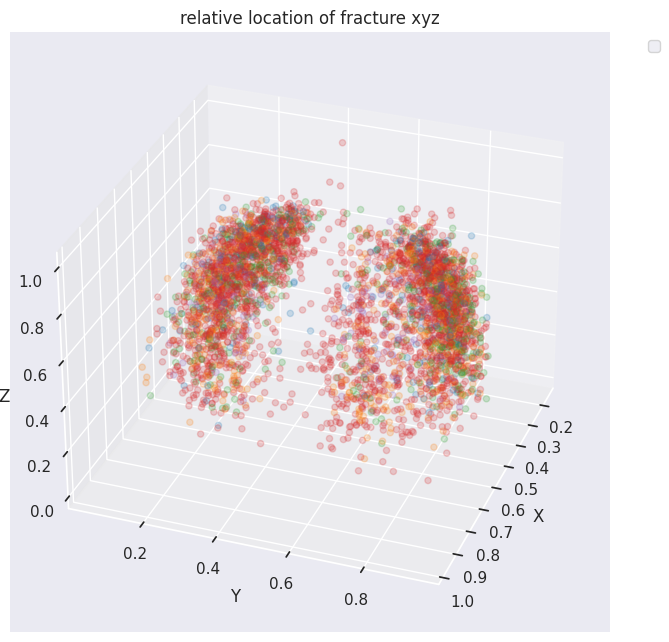

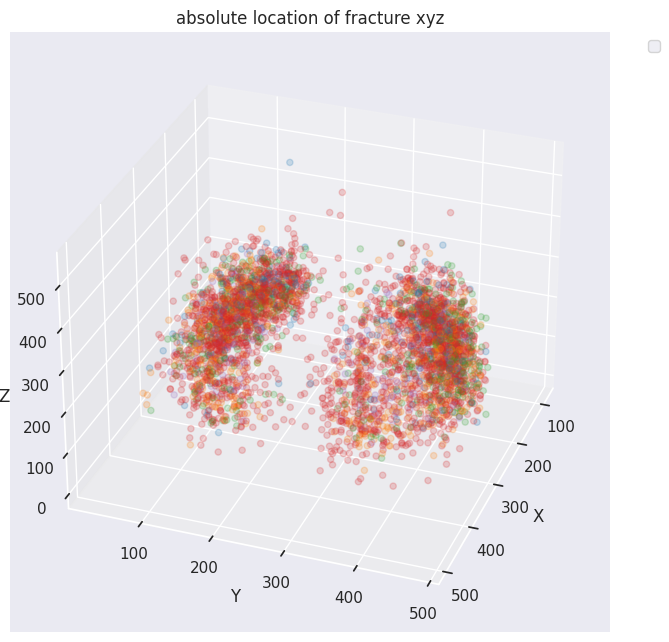

In [24]:
sns.scatterplot(data=df_frac, x='loc_y', y='loc_x', hue='frac_code_name')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 512)
plt.ylim(0, 512)
plt.title('location of fracture xy (absolute=relative)')
plt.show()

sns.scatterplot(data=df_frac, x='loc_x', y='loc_z', hue='frac_code_name')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 512)
plt.ylim(0, df_frac['loc_z'].max())
plt.title('location of fracture xz')
plt.show()

sns.scatterplot(data=df_frac, x='rel_loc_x', y='rel_loc_z', hue='frac_code_name')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('relative (z) location of fracture xz')
plt.show()

sns.scatterplot(data=df_frac, x='loc_y', y='loc_z', hue='frac_code_name')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 512)
plt.ylim(0, df_frac['loc_z'].max())
plt.title('location of fracture yz')
plt.show()

sns.scatterplot(data=df_frac, x='rel_loc_y', y='rel_loc_z', hue='frac_code_name')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('relative (z) location of fracture yz')
plt.show()

# 3d scatterplot of fracture location
da.scatter3d(df_frac['rel_loc_x'], df_frac['rel_loc_y'], df_frac['rel_loc_z'], df_frac['frac_code_name'], title='relative location of fracture xyz')
da.scatter3d(df_frac['loc_x'], df_frac['loc_y'], df_frac['loc_z'], df_frac['frac_code_name'], title='absolute location of fracture xyz')

## Testing preprocessing results

In this section we aim to test different preprocessing approaches and compare the results that different approaches yield.

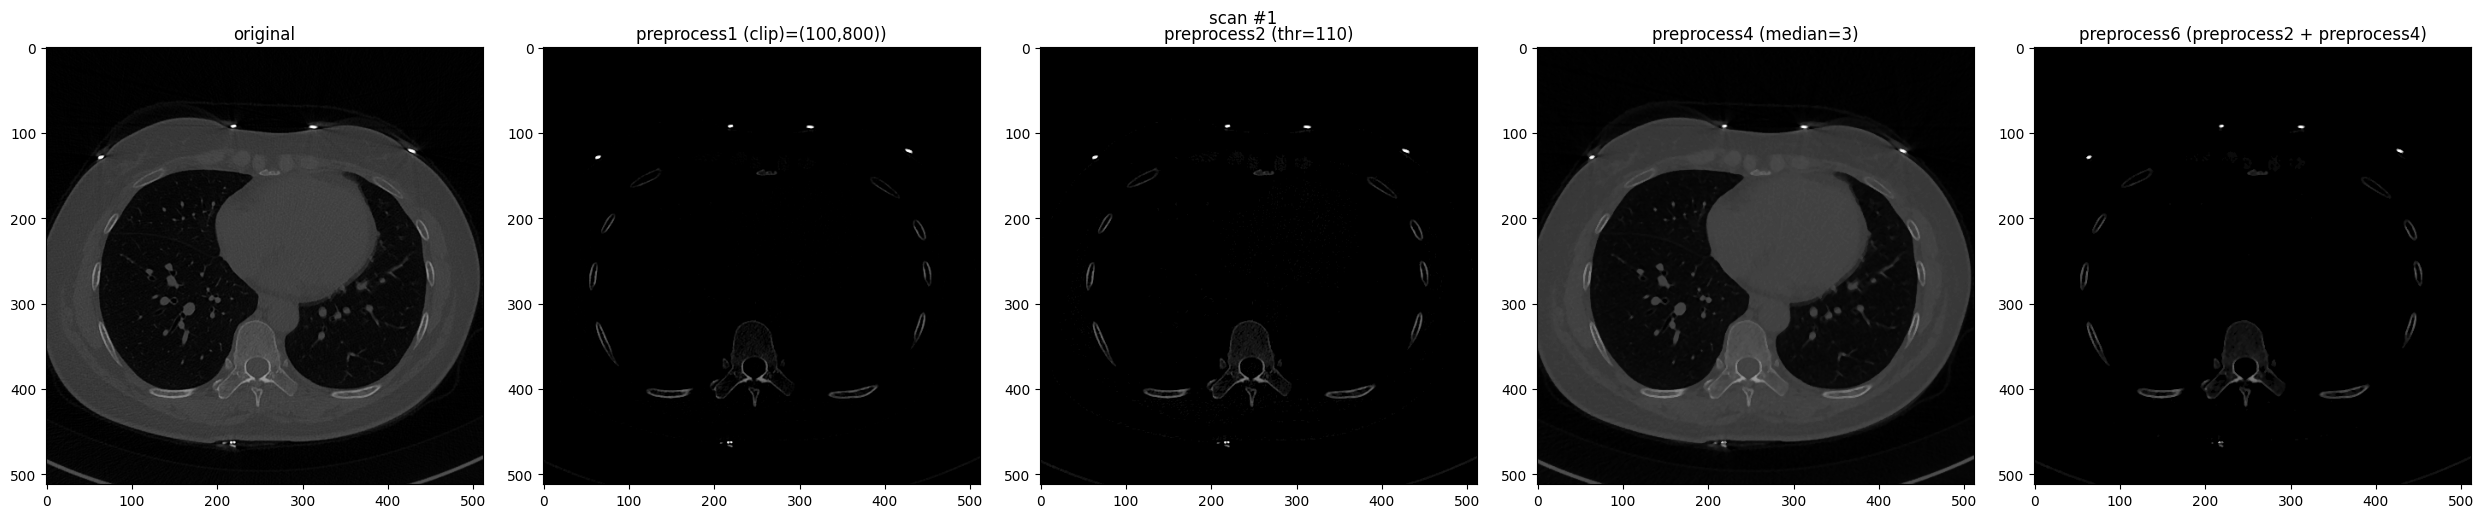

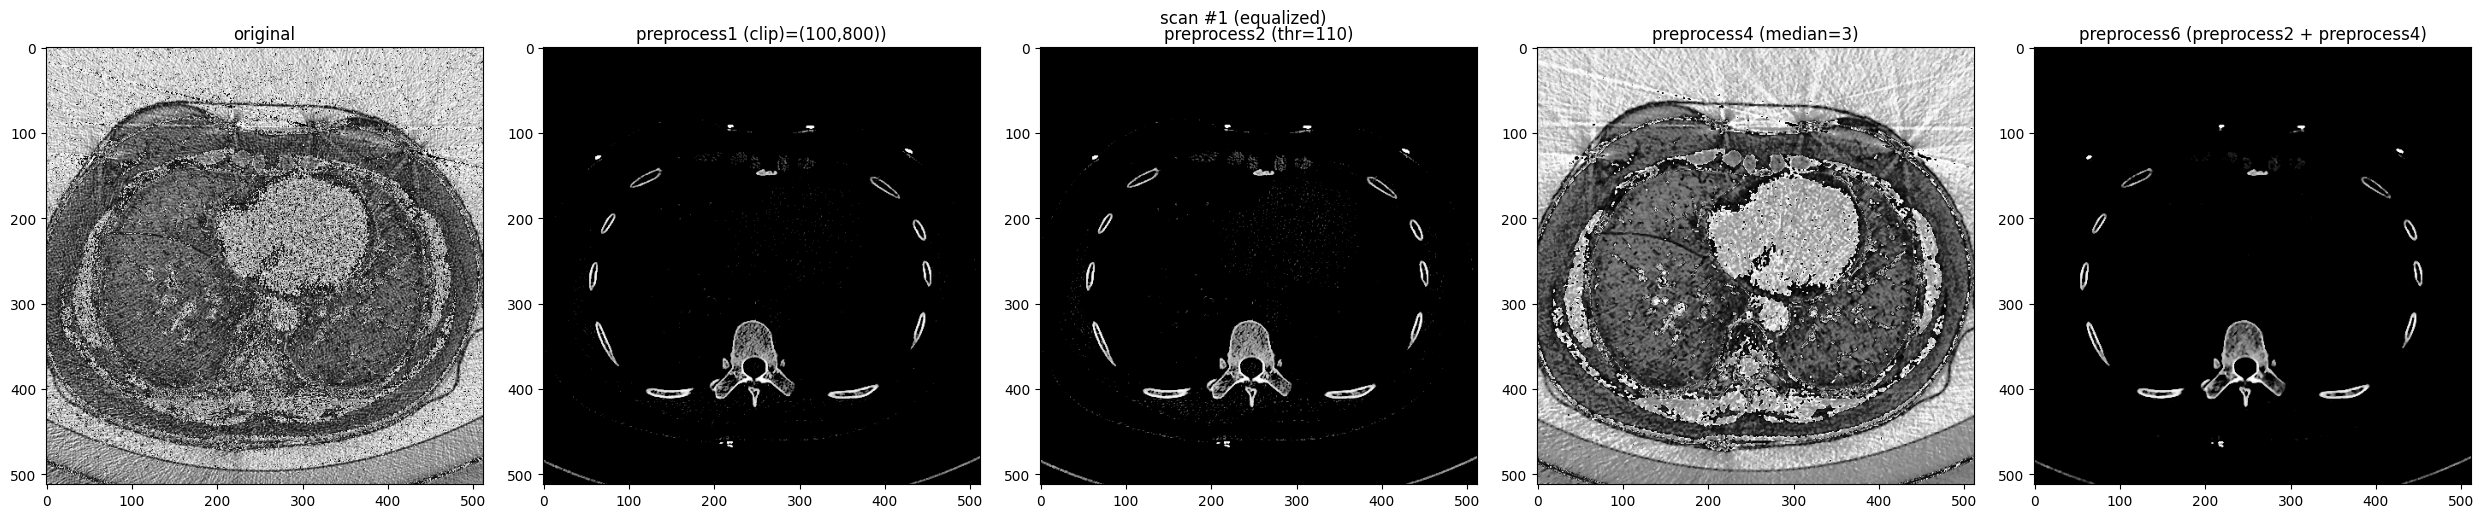

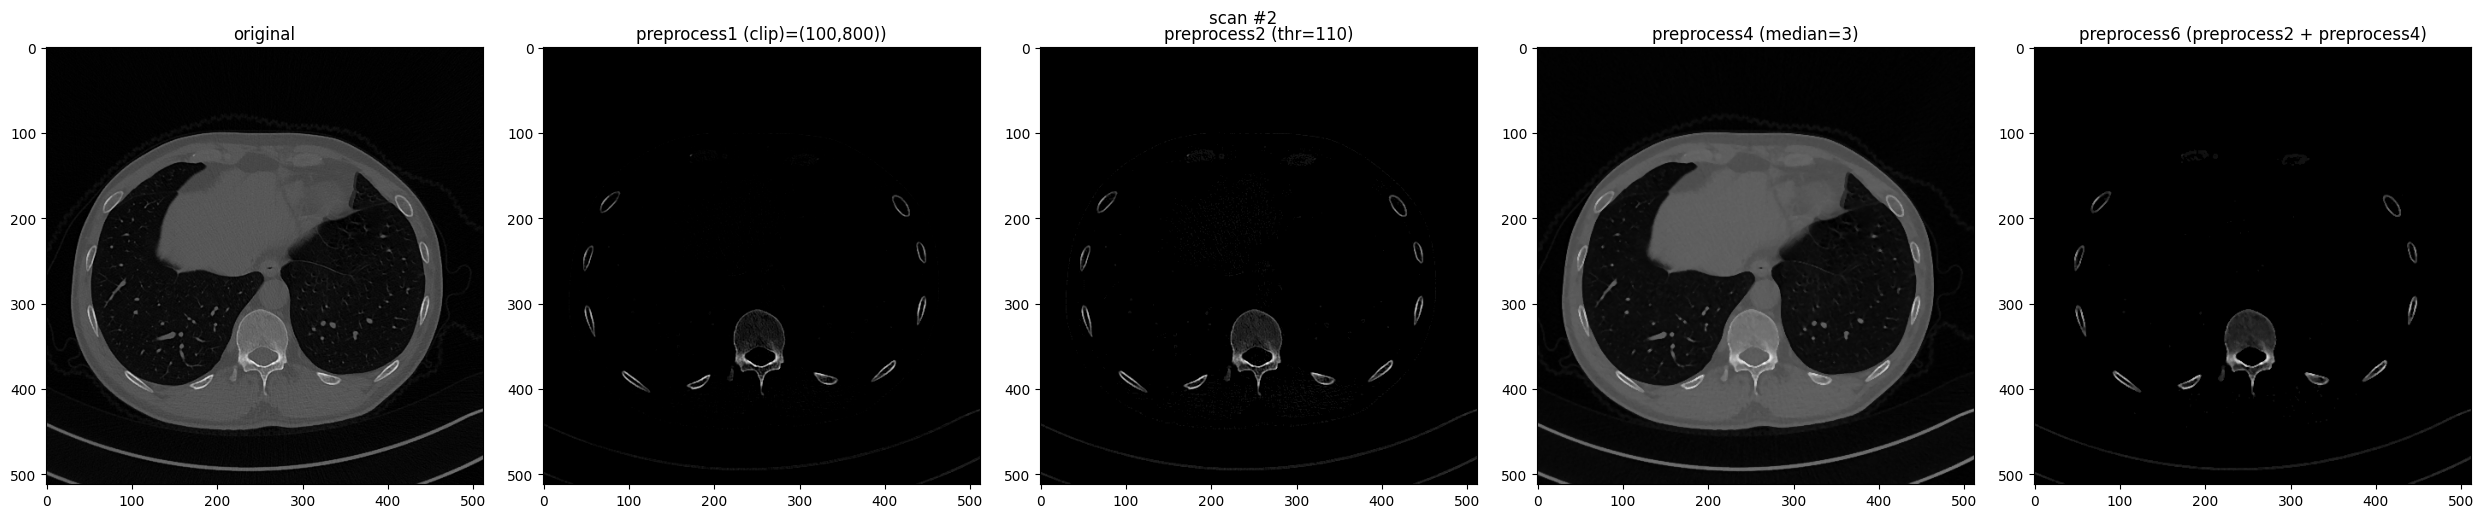

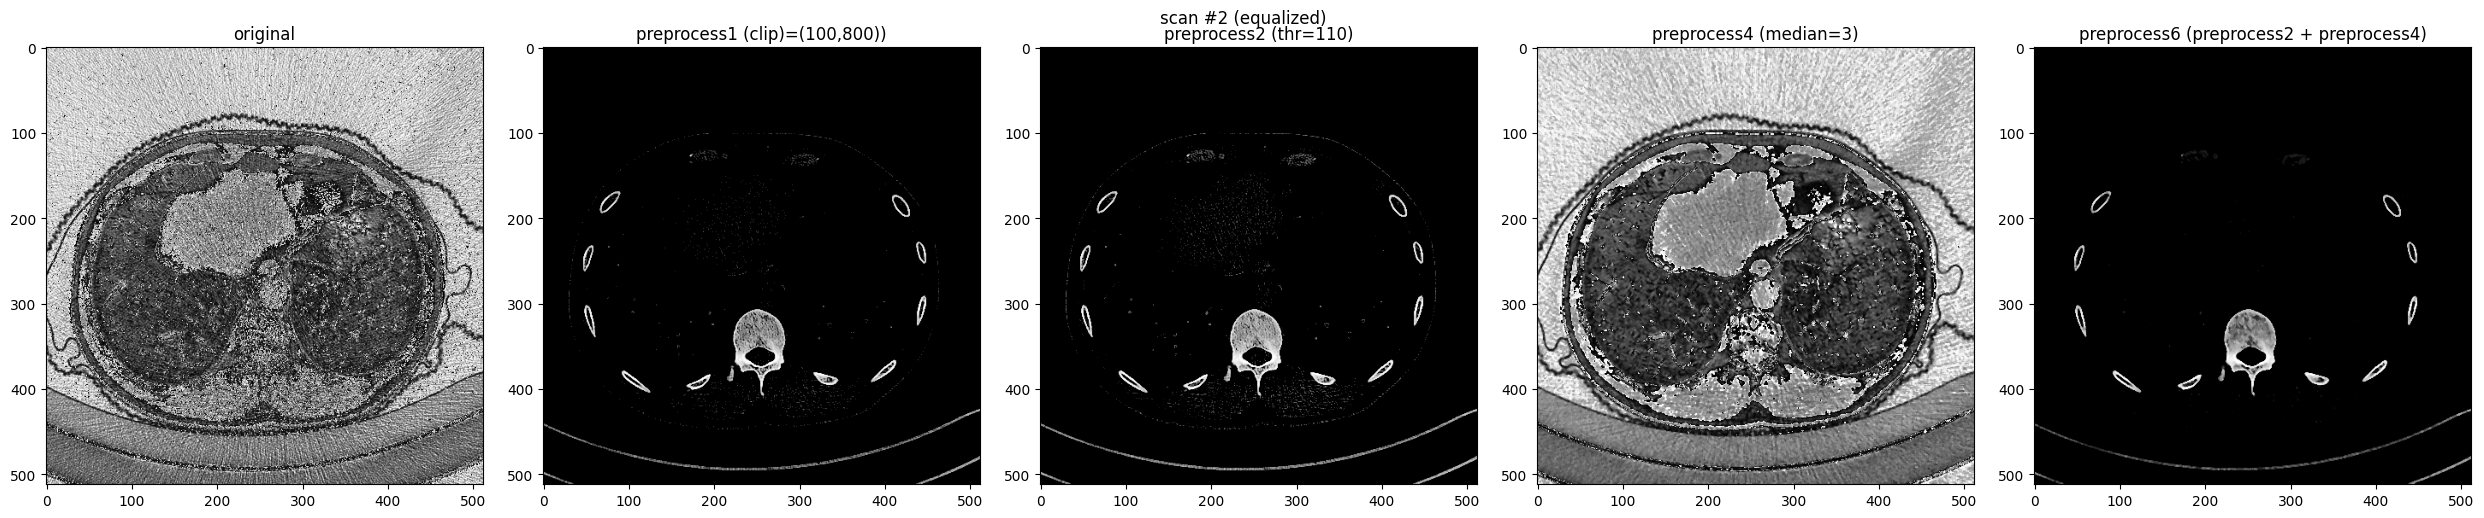

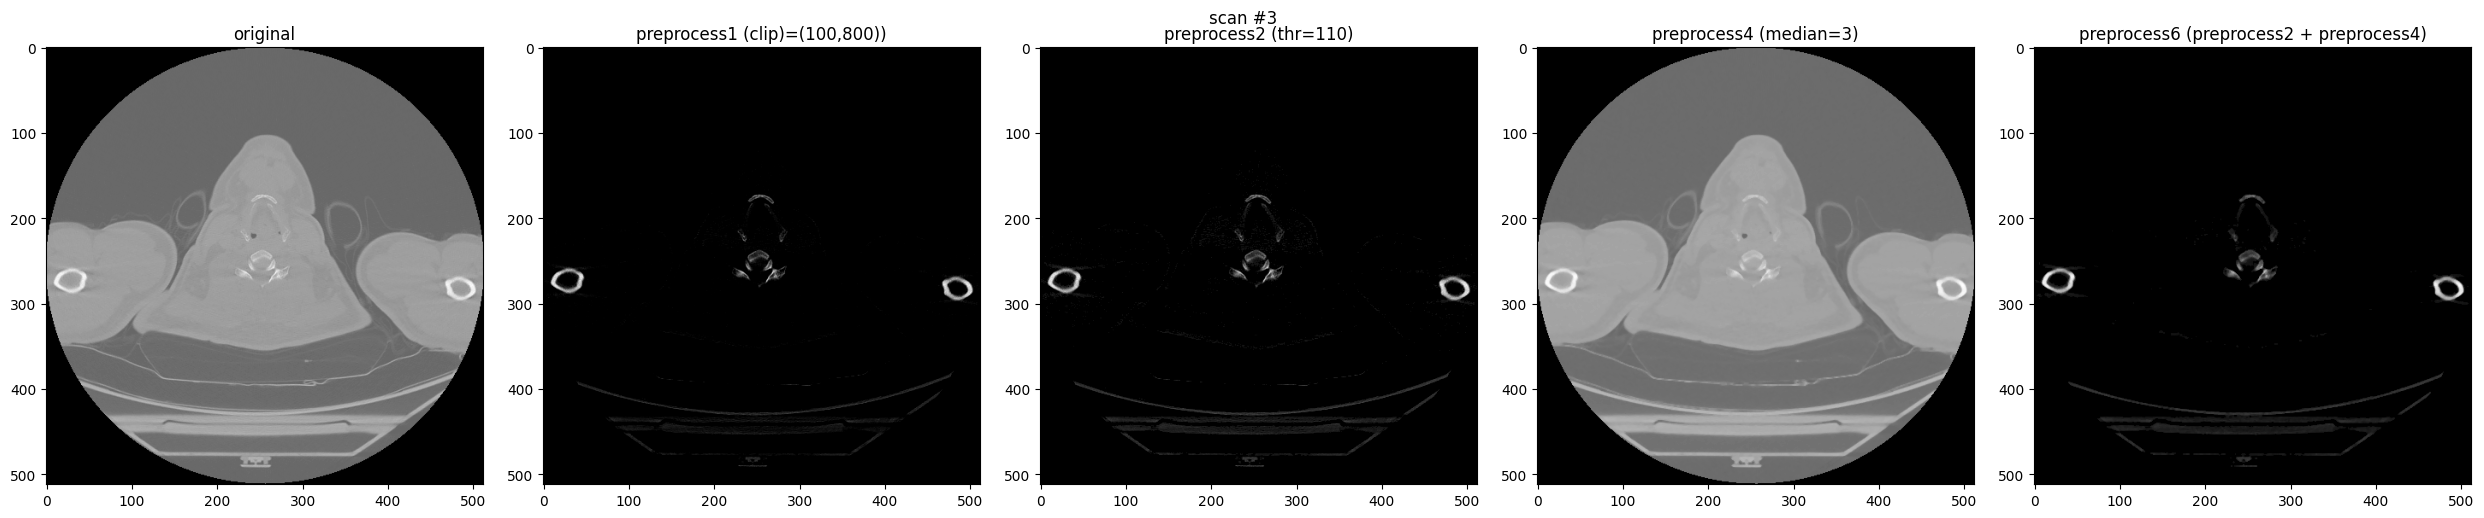

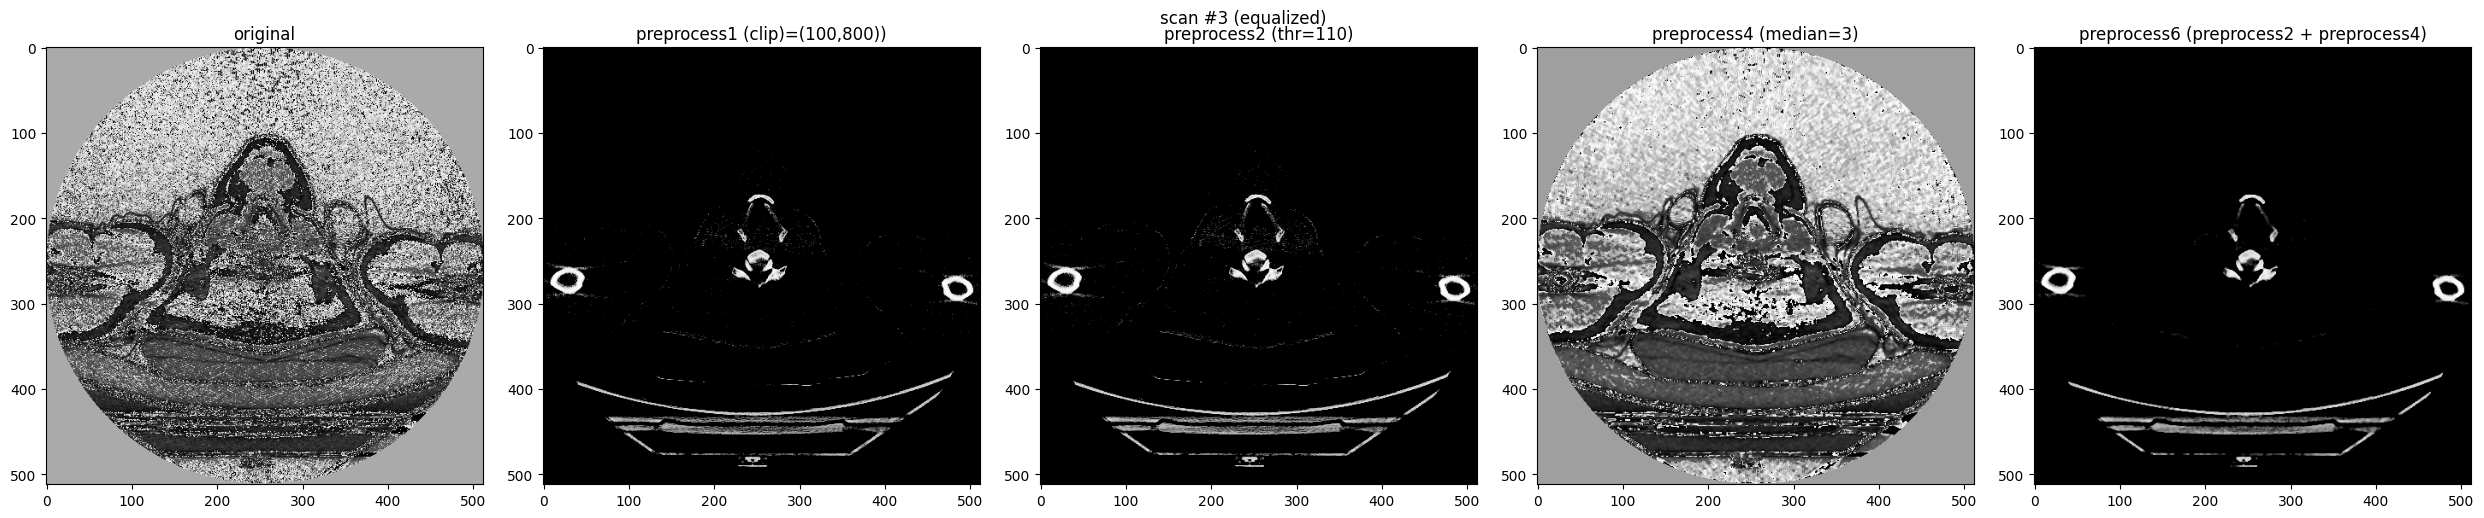

In [2]:
# comparing preprocessing methods

def preprocess1(img):
    """
    First step of preprocessing: clip values (top and bottom) and minmax-normalize. 
    """
    clip_min_val = 100  # design hyperparameter
    clip_max_val = 8000  # design hyperparameter
    img = img.clip(clip_min_val, clip_max_val)
    img = da.minmax(img, range=(clip_min_val, clip_max_val))
    return img

def preprocess2(img):
    """threshold at 110, then minmax-normalize"""
    threshold = 110
    img = img.copy()
    img[img < threshold] = 0
    img = da.minmax(img)
    return img

def preprocess3(img):
    """threshold at 120, then minmax-normalize"""
    threshold = 120
    img = img.copy()
    img[img < threshold] = 0
    img = da.minmax(img)
    return img

preprocess4 = lambda x: da.remove_noise(x.copy(), 3)
preprocess5 = lambda x: da.remove_noise(x.copy(), 5)
preprocess6 = lambda x: preprocess4(preprocess2(x.copy()))


# visualize

n_images = 3
n = 0
for filename in os.listdir(TRAIN_IMAGES):
    if n >= n_images:
        break
    if 'label' in filename:
        print('WARNING: Directory structure is not as expected. Ignoring file', filename)
        continue
    else:
        n += 1
    path = os.path.join(TRAIN_IMAGES, filename)
    scan = nib.load(path).get_fdata().T.astype(float)  # (z, x, y)
    slice_idx = np.random.randint(0, scan.shape[0])  # select random slice
    slice_ = scan[slice_idx]

    imgs = [slice_, preprocess1(slice_), preprocess2(slice_), preprocess4(slice_), preprocess6(slice_)]
    titles = ['original', 'preprocess1 (clip)=(100,800))', 'preprocess2 (thr=110)',
              'preprocess4 (median=3)', 'preprocess6 (preprocess2 + preprocess4)']
    da.imshow_multiple(imgs, titles=titles, suptitle='scan #{}'.format(n))
    imgs_eq = [da.histogram_equalization(img) for img in imgs]
    da.imshow_multiple(imgs_eq, titles=titles, suptitle='scan #{} (equalized)'.format(n))

## Voxel value analysis

In this section, we explore the voxel values of the scans, their distribution and statistics. This is helpful for several purposes:
- Select value thresholding hperparameters
- Identify problematic features in data, e.g. backplate
- Standarize data, i.e. mean and std

### Sum all scans

We sum all scan values in a single volume, using absolute coordinates and aligned at top (x=0). Pixel values should have been somehow preprocessed and thresholded beforehand. (Estimated time: 15min)

In [15]:
mean, std, cum_scan_top, avg_scan_top, max_values = da.compute_or_load_pixel_analysis(ANALYSIS_ROOT, TRAIN_IMAGES, preprocess1, align='top')

Loaded existing analysis


In [ ]:
# example gif
da.create_gif(da.histogram_equalization(da.minmax(avg_scan_top)), save_path=os.path.join(ANALYSIS_ROOT, 'avg_scan_aligntop_eq.gif'))

In [4]:
mean, std, cum_scan_bottom, avg_scan_bottom, max_values = da.compute_or_load_pixel_analysis(ANALYSIS_ROOT, TRAIN_IMAGES, lambda x: np.clip(x, 100, None), align='bottom')

Loaded existing analysis


In [5]:
# example gif
da.create_gif(da.histogram_equalization(da.minmax(avg_scan_bottom)), save_path=os.path.join(ANALYSIS_ROOT, 'avg_scan_alignbottom_eq.gif'))

saved gif at /home/scur0569/rib-fracture/data/analysis/avg_scan_alignbottom_eq.gif


#### Pixel value global statistics

We compute the mean and standard deviation of pixel values of all the scans in the training set.

In [9]:
print('mean=', mean)
print('std=', std)

mean= 0.003524213558770248
std= 0.027642784892633172


In [ ]:
sns.histplot(max_values, bins=100)
plt.show()

#### Detail enhancement

We perform histogram equalization on the images to improve contrast. (Estimated time: unknown)

In [10]:
def show_and_save_cum_avg_eq(*args, align):
    minmax_args = tuple(da.minmax(arg) for arg in args)

    cum_scan, cum_slice, cum_slice_eq, cum_scan_eq, cum_scan_eq_slicewise, \
        avg_scan, avg_slice, avg_slice_eq, avg_scan_eq, avg_scan_eq_slicewise = minmax_args

    # plot summed slices
    da.imshow(cum_slice, title='combined slices (cummulative)', range=(0, 1))
    da.imshow(cum_slice_eq, title='combined slices (cummulative) equalized', range=(0, 1))
    da.imshow(avg_slice, title='combined slices (average)', range=(0, 1))
    da.imshow(avg_slice_eq, title='combined slices (average) equalized', range=(0, 1))

    # save gifs
    da.create_gif(cum_scan, save_path=os.path.join(ANALYSIS_ROOT, f'cum_scan_align{align}.gif'))
    da.create_gif(cum_scan_eq, save_path=os.path.join(ANALYSIS_ROOT, f'cum_scan_align{align}_eq.gif'))
    da.create_gif(cum_scan_eq_slicewise, save_path=os.path.join(ANALYSIS_ROOT, f'cum_scan_align{align}_eq_slicewise.gif'))
    da.create_gif(avg_scan, save_path=os.path.join(ANALYSIS_ROOT, f'avg_scan_align{align}.gif'))
    da.create_gif(avg_scan_eq, save_path=os.path.join(ANALYSIS_ROOT, f'avg_scan_align{align}_eq.gif'))
    da.create_gif(avg_scan_eq_slicewise, save_path=os.path.join(ANALYSIS_ROOT, f'avg_scan_align{align}_eq_slicewise.gif'))

In [5]:
out = da.compute_or_load_eq(ANALYSIS_ROOT, cum_scan_top, avg_scan_top, align='top')
show_and_save_cum_avg_eq(*out, align='top')

NameError: name 'cum_scan_top' is not defined

### Pixel distribution in X

We project all slices into X axis so that we see bone distribution in X, and luckily spot a threshold to differentiate the backplate from the rib cage.

In [ ]:
x_distrib = cum_scan_top.sum(axis=(0, 2)).flatten()
sns.barplot(x=x_distrib, y=list(range(len(x_distrib))), orient='h')
ticks = np.linspace(0, len(x_distrib), 8).astype(int)
plt.yticks(ticks, ticks)
plt.title('distribution of pixels in x (cumulative)')
plt.show()

x_distrib = avg_scan_top.sum(axis=(0, 2)).flatten()
sns.barplot(x=x_distrib, y=list(range(len(x_distrib))), orient='h')
ticks = np.linspace(0, len(x_distrib), 8).astype(int)
plt.yticks(ticks, ticks)
plt.title('distribution of pixels in x (average)')

### Pixel distribution in Z

We project all slices into Z axis so that we see bone distribution in Z, and luckily spot a cliff where there are no ribs present in a slice (slices in the bottom only contain spine).

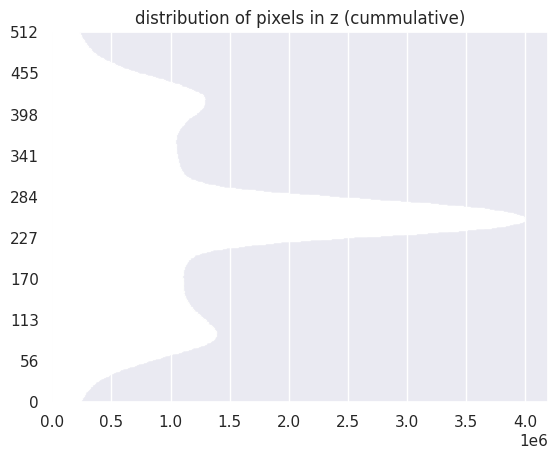

NameError: name 'avg_scan' is not defined

In [7]:
def plot_z_distrib(cum_scan, avg_scan, *, align):
    z_distrib = cum_scan.sum(axis=(0, 1)).flatten()
    sns.barplot(x=z_distrib, y=list(range(len(z_distrib))), orient='h')
    plt.gca().invert_yaxis()  # 0 at bottom
    ticks = np.linspace(0, len(z_distrib), 8).astype(int)
    plt.yticks(ticks, ticks)
    plt.title('distribution of pixels in z (cummulative) align={}'.format(align))
    plt.show()

    z_distrib = avg_scan.sum(axis=(0, 1)).flatten()
    sns.barplot(x=z_distrib, y=list(range(len(z_distrib))), orient='h')
    plt.gca().invert_yaxis()  # 0 at bottom
    ticks = np.linspace(0, len(z_distrib), 8).astype(int)
    plt.yticks(ticks, ticks)
    plt.title('distribution of pixels in z (average) align={}'.format(align))
    plt.show()

In [ ]:
plot_z_distrib(cum_scan_top, avg_scan_top, align='top')

### Different alignments in Z

We test the same with different alignments for the Z axis. We compute analysis again for different alignments. (Estimated time: 3x(15min+unknown))

If the scans with different z-sizes happen to be aligned in one specific manner, say bottom, we will not need to normalize heights to provide relative coordinates in positional encoding.

In [33]:
for align in ['top', 'bottom', 'center', 'fit']:
    print('\nALIGN={}'.format(align))
    _, _, cum_scan, avg_scan = da.compute_or_load_pixel_analysis(ANALYSIS_ROOT, TRAIN_IMAGES, preprocess1, align=align)
    out = da.compute_or_load_eq(ANALYSIS_ROOT, cum_scan, avg_scan, align=align)
    show_and_save_cum_avg_eq(*out, align=align)
    plot_z_distrib(cum_scan_top, avg_scan_top, align=align)

## Connected component analysis

We use dilation + connected component analysis on the slice data to be able to identify and isolate the backplate. With closing or filling operations, the backplate can be identified as the biggest component in the segmentation most of the times. However, this might not always be the case. In this section we will see:
- Distribution of location of connected components.
- Distribution of areas of connected components.
- Select cutoff height (in x direction) or area threshold.
- How many times the biggest component is the backplate, based on the location of the selected component.
- How many slices don't contain a backplate, based on the amount of connected components under the cutoff height.

In [3]:
df_conn_comp = da.compute_or_load_conn_comp_analysis(ANALYSIS_ROOT, TRAIN_IMAGES, preprocess1, max_files=10, max_slices=50)

Loaded existing analysis


In [4]:
df_conn_comp.head()

public_id  slice_idx  conn_comp_label  is_largest  min_x  max_x  min_y  \
0  RibFrac145         44                0       False      0    511      0   
1  RibFrac145         44                1       False    200    202    175   
2  RibFrac145         44                2       False    214    216    116   
3  RibFrac145         44                3       False    214    236    394   
4  RibFrac145         44                4       False    217    232    373   

   max_y  ctr_x  ctr_y       com_x       com_y    area  
0    511  255.5  255.5  228.450827  254.186281  212110  
1    177  201.0  176.0  201.000000  176.000000       5  
2    118  215.0  117.0  215.000000  117.000000       5  
3    418  225.0  406.0  224.964467  405.644670     394  
4    375  224.5  374.0  224.500000  374.000000      44

In [5]:
df_conn_comp.describe()

slice_idx  conn_comp_label          min_x          max_x  \
count  334938.000000    334938.000000  334938.000000  334938.000000   
mean      165.451149        42.243069     257.510524     274.996211   
std       106.304783        30.459644     104.354334     105.399787   
min         0.000000         0.000000       0.000000       2.000000   
25%        71.000000        17.000000     177.000000     190.000000   
50%       158.000000        37.000000     253.000000     270.000000   
75%       249.000000        62.000000     346.000000     363.000000   
max       447.000000       196.000000     509.000000     511.000000   

               min_y          max_y          ctr_x          ctr_y  \
count  334938.000000  334938.000000  334938.000000  334938.000000   
mean      249.535720     273.372063     266.253368     261.453891   
std       141.155945     140.446089      99.696067     134.445873   
min         0.000000       1.000000       1.000000       0.500000   
25%       122.000000     146.000000     187.000000     141.000000   
50%       252.000000     289.000000     260.500000     262.000000   
75%       376.000000     397.000000     350.000000     381.000000   
max       510.000000     511.000000     510.000000     510.500000   

               com_x          com_y           area  
count  334938.000000  334938.000000  334938.000000  
mean      266.261713     261.419733    3857.662538  
std       100.145110     134.537932   26583.070824  
min         0.714286       0.250000       4.000000  
25%       186.500000     141.000000       5.000000  
50%       260.500000     263.000000       8.000000  
75%       351.000000     381.000000      28.000000  
max       510.272727     510.750000  257371.000000

### Distribution of components

We show the distribution of the location of connected components within the slice. We also compare the position to the area of each component. The aim is to find a clear cutoff for the backplate component, which expected to be the biggest and to be found below a certain x value.

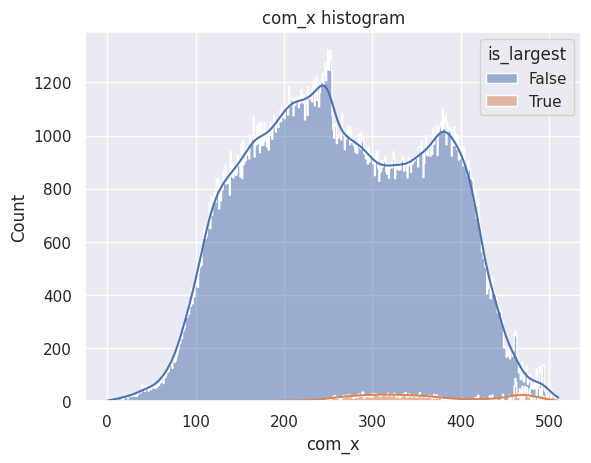

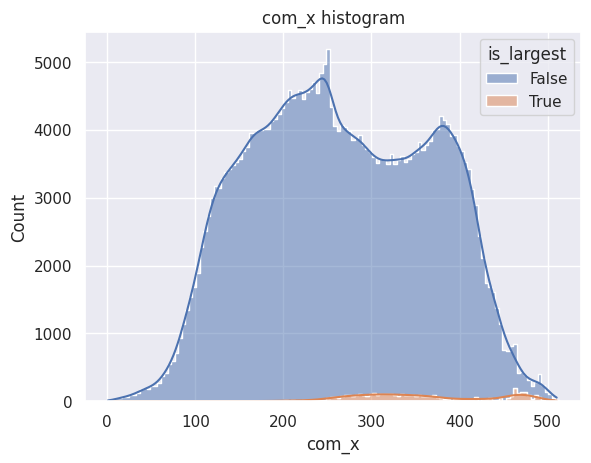

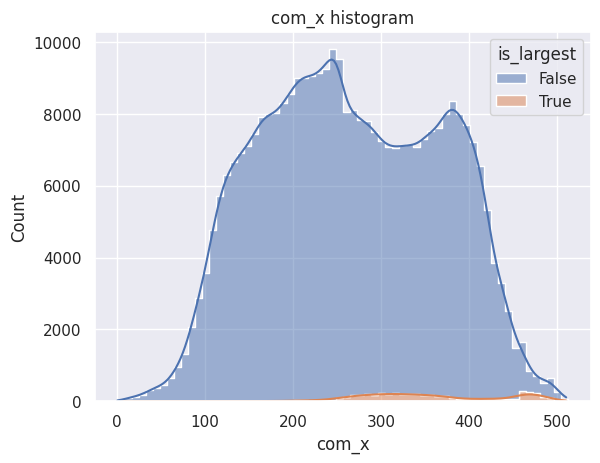

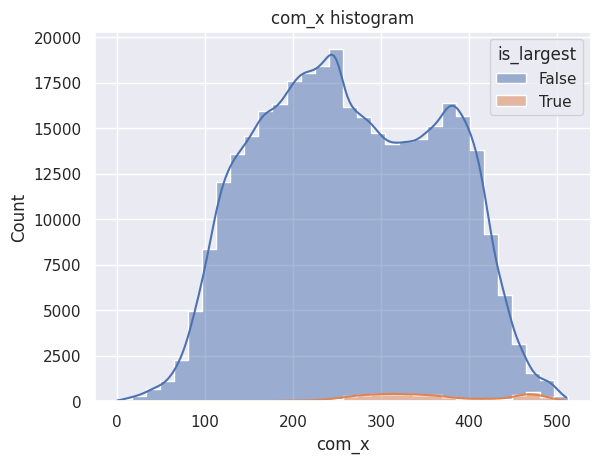

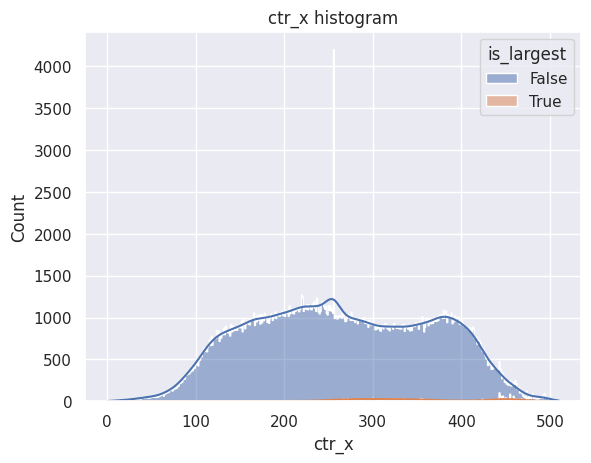

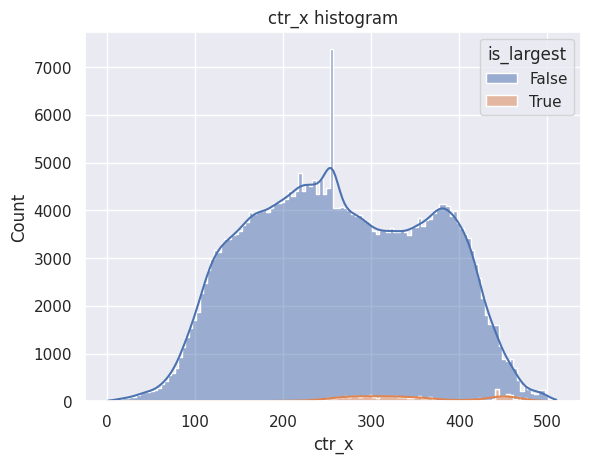

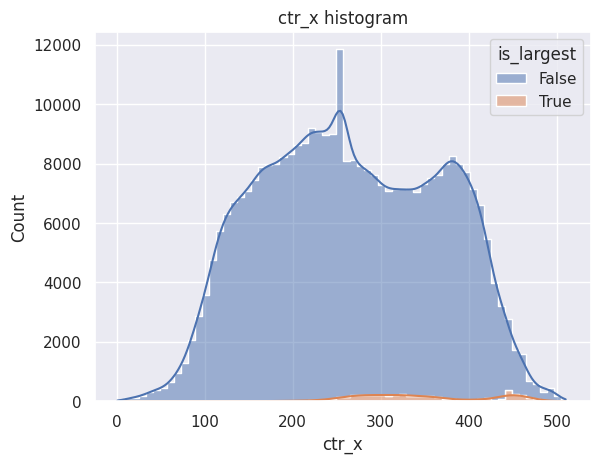

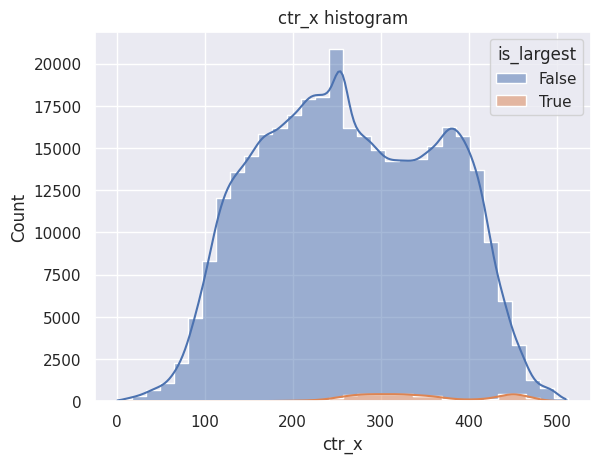

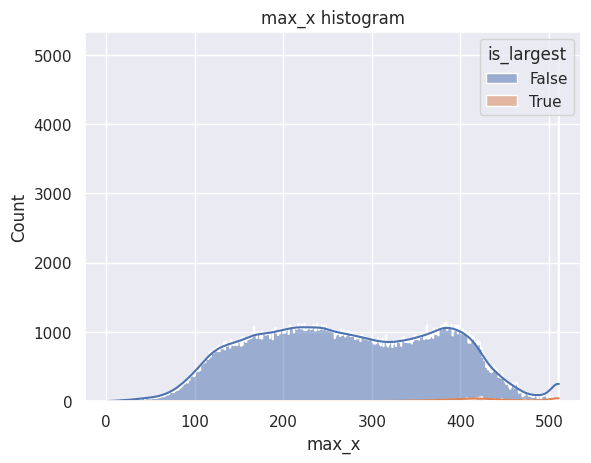

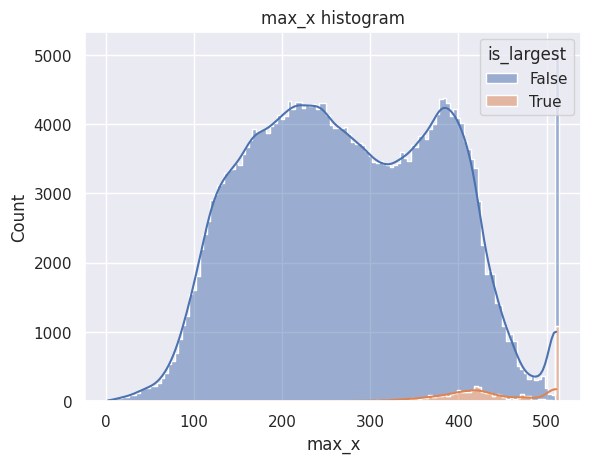

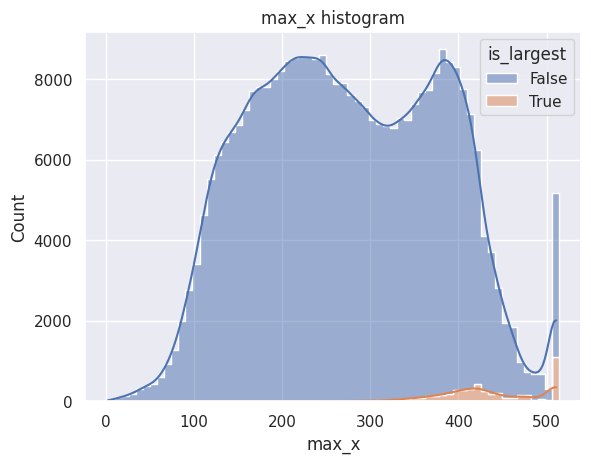

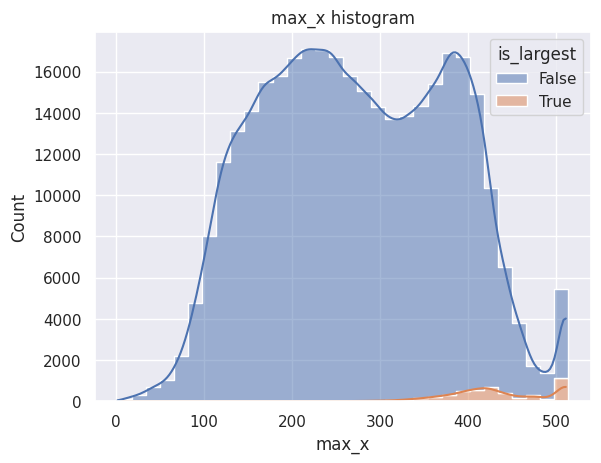

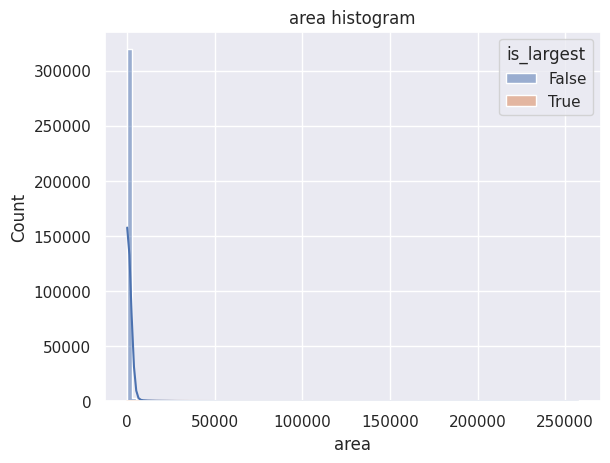

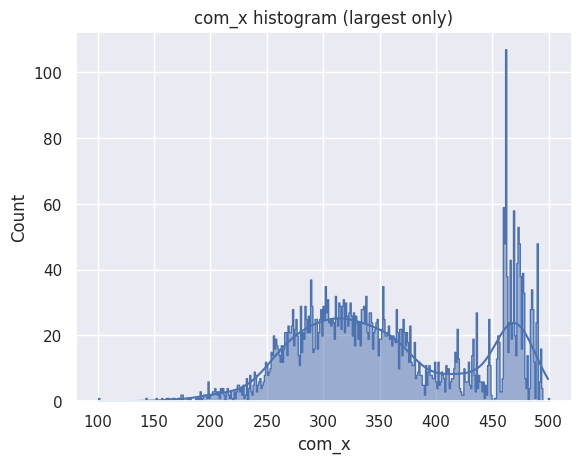

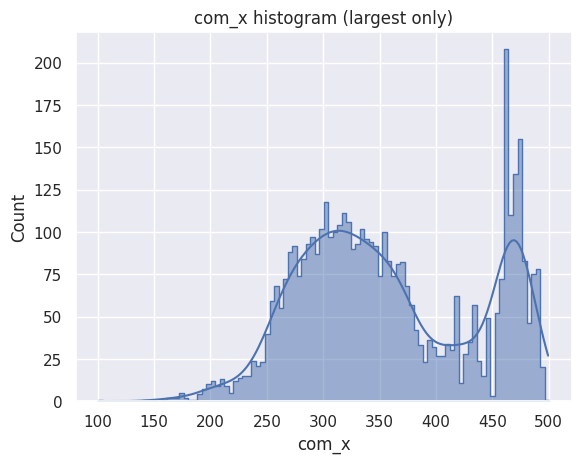

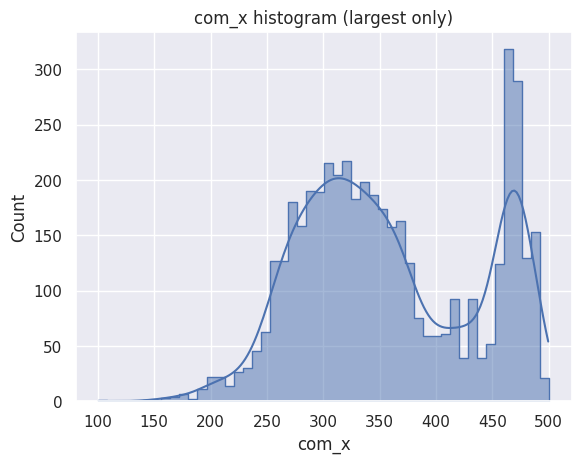

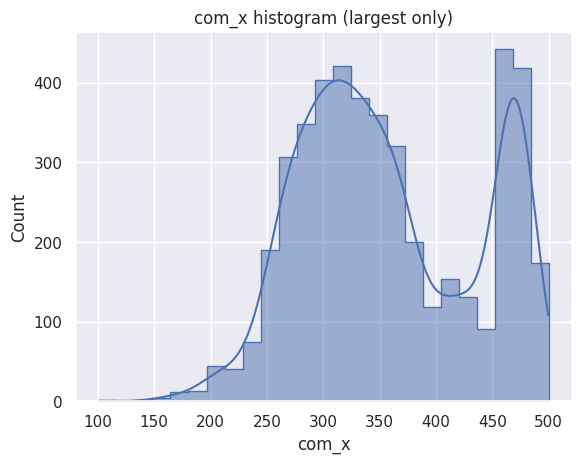

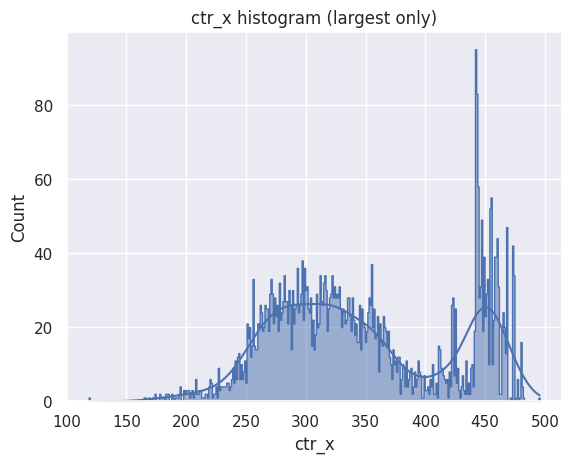

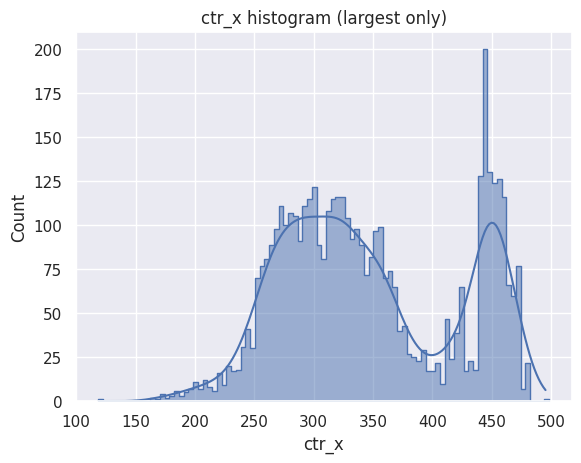

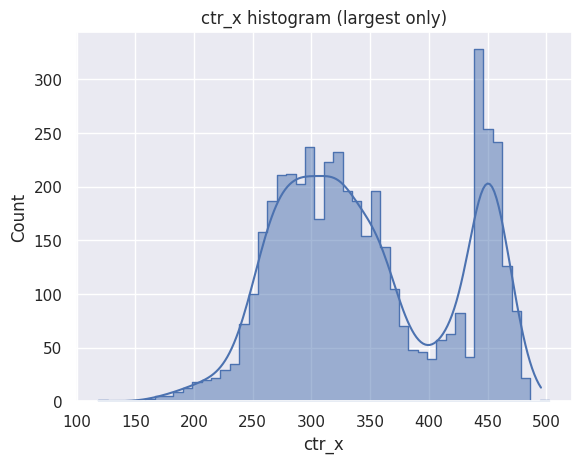

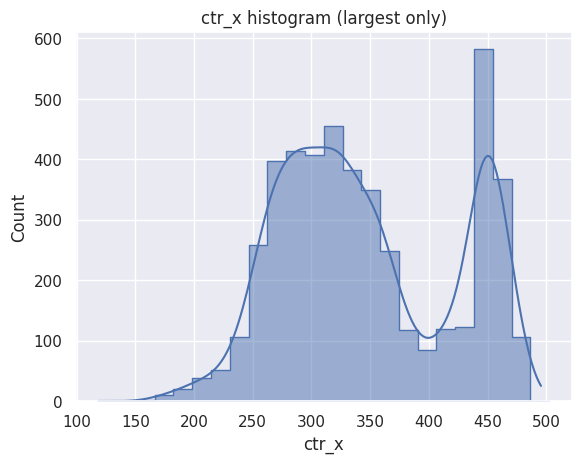

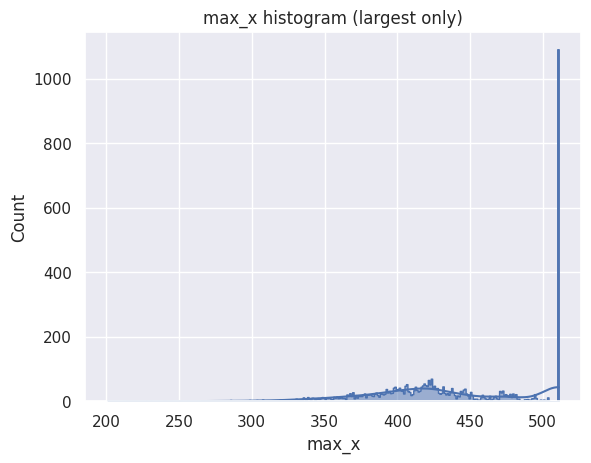

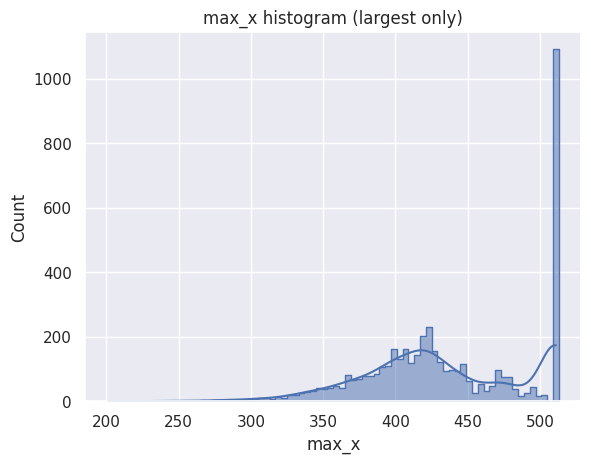

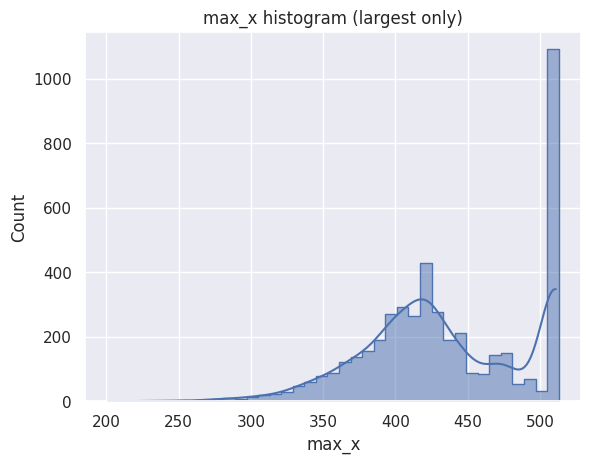

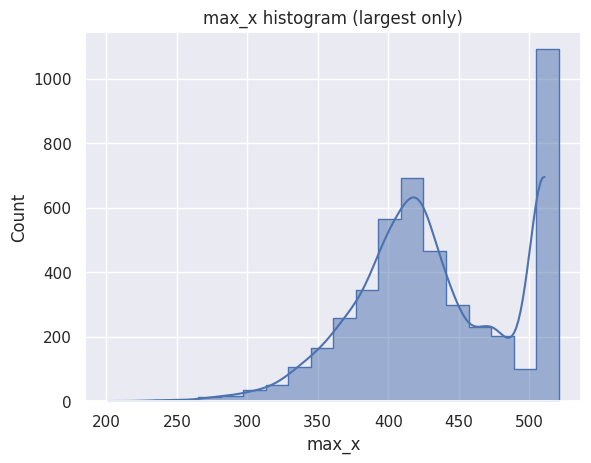

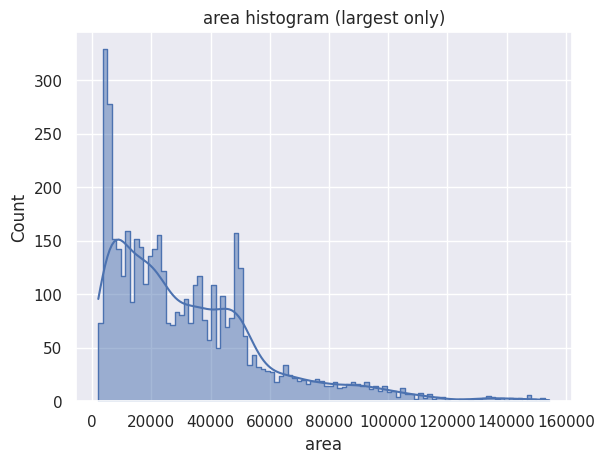

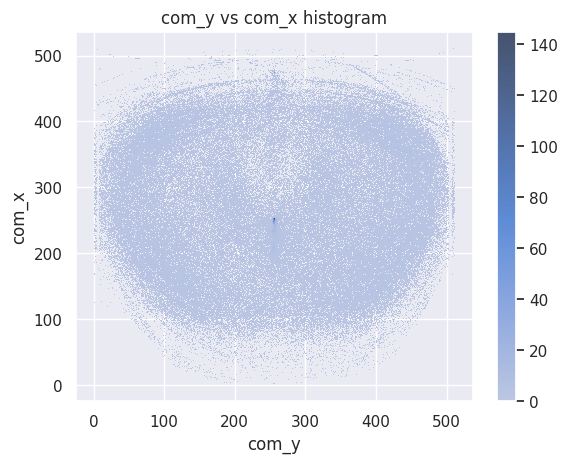

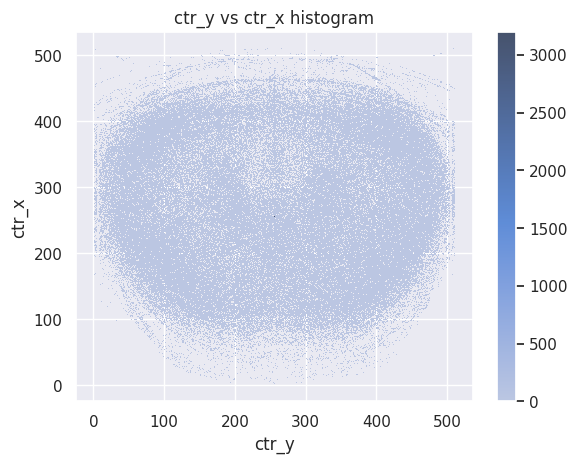

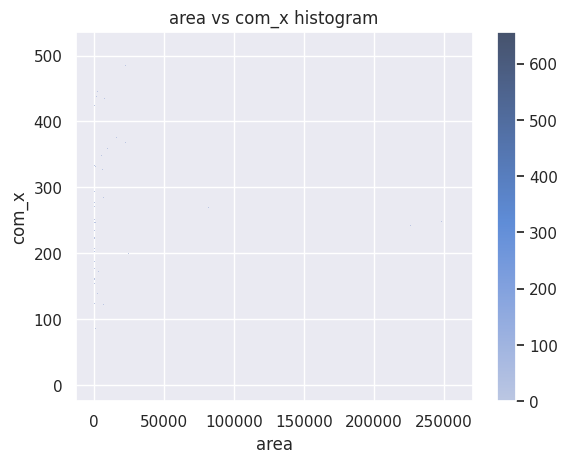

: 

In [ ]:
df_largest = df_conn_comp[df_conn_comp['is_largest']]

# 1d histogram

for attr in ['com_x', 'ctr_x', 'max_x']:
    break  # TODO remove
    for binwidth in [1, 4, 8, 16]:
        plt.figure()
        sns.histplot(data=df_conn_comp, x=attr, hue='is_largest', binwidth=binwidth, kde=True, multiple="stack", element='step', cbar=True)
        plt.title(f'{attr} histogram')
        plt.show()
plt.figure()
sns.histplot(data=df_conn_comp, x='area', hue='is_largest', bins=100, kde=True, multiple="stack", element='step', cbar=True)
plt.title('area histogram')
plt.show()

for attr in ['com_x', 'ctr_x', 'max_x']:
    break  # TODO remove
    for binwidth in [1, 4, 8, 16]:
        plt.figure()
        sns.histplot(data=df_largest, x=attr, binwidth=binwidth, kde=True, element='step', cbar=True)
        plt.title(f'{attr} histogram (largest only)')
        plt.show()
plt.figure()
sns.histplot(data=df_largest, x='area', bins=100, kde=True, element='step', cbar=True)
plt.title('area histogram (largest only)')
plt.show()

# TODO: choose best binwidth (8)
# TODO: choose best com vs ctr (com)

# 2d histogram

binwidth = 10
vs = [('com_y', 'com_x'), ('ctr_y', 'ctr_x'), ('area', 'com_x'), ('com_y', 'area')]

for vs_x, vs_y in vs:
    plt.figure()
    sns.histplot(data=df_conn_comp, x=vs_x, y=vs_y, binwidth=binwidth, cbar=True)
    plt.title(f'{vs_x} vs {vs_y} histogram')
    plt.show()
    
for vs_x, vs_y in vs:
    plt.figure()
    sns.histplot(data=df_largest, x=vs_x, y=vs_y, binwidth=binwidth, cbar=True)
    plt.title(f'{vs_x} vs {vs_y} histogram (largest only)')
    plt.show()

### Data statistics for standarization

The model will receive patches with bones only, so we will compute the estimation of the statistics sampling patches from the dataloader. The patches from the dataloader are previously clipped and normalized to the range [0,1].

We estimate `mean` $\mu$ and `std` $\sigma$ from dataset $\mathcal{D}$ as follows:

$$\mu = \mathbb{E}_{x\sim\mathcal{D}}[x]\approx\frac{1}{N}\sum_{n=1}^Nx_n$$

$$\sigma^2 = \mathbb{E}_{x\sim\mathcal{D}}[x^2] - \mu^2\approx\left(\frac{1}{N}\sum_{n=1}^Nx_n^2\right)-\mu^2$$

where $\mathbb{E}_{x\sim\mathcal{D}}$ is the expected value, estimated by sampling $N$ patches $x_n$ from the dataset $\mathcal{D}$ using the dataloader. Once we have computed $\mu$ and $\sigma$, we will standarize the data before feeding it to the model as follows:

$$\hat{x} = \frac{x - \mu}{\sigma}$$

>The estimated data statistics are: `mean=0.026828503255875637` and `std=0.0841274274493532`.

In [1]:
import torch.utils.data as data
import json

import sys
sys.path.append(sys.path.append(os.path.abspath('..')))
from dataset import RibFracDataset

class Cfg:
    data_root = DATASET_ROOT
    context_size = 0
    patch_original_size = 64
    patch_final_size = 256
    proportion_fracture_in_patch = 0.05
    cutoff_height = 450 + 32
    clip_min_val = 100
    clip_max_val = 2000
    data_mean = 0
    data_std = 1
    test_stride = 32
    force_data_info = False
    seed = 42
    batch_size_train = 64
    num_workers = 2  # 18


cfg = Cfg()

train_set = RibFracDataset(
    root_dir=cfg.data_root,
    partition="train",
    context_size=cfg.context_size,
    patch_original_size=cfg.patch_original_size,
    patch_final_size=cfg.patch_final_size,
    proportion_fracture_in_patch=cfg.proportion_fracture_in_patch,
    cutoff_height=cfg.cutoff_height,
    clip_min_val=cfg.clip_min_val,
    clip_max_val=cfg.clip_max_val,
    data_mean=cfg.data_mean,
    data_std=cfg.data_std,
    test_stride=cfg.test_stride,
    force_data_info=cfg.force_data_info,
)
train_sampler = train_set.get_train_sampler(seed=cfg.seed)
train_loader = data.DataLoader(
    train_set,
    sampler=train_sampler,
    batch_size=cfg.batch_size_train,
    drop_last=True,
    pin_memory=True,
    num_workers=cfg.num_workers,
)

LOG_FILE = os.path.join(ANALYSIS_ROOT, 'statistics_log.csv')
OUT_FILE = os.path.join(ANALYSIS_ROOT, 'statistics.json')
os.makedirs(os.path.dirname(LOG_FILE), exist_ok=True)
os.makedirs(os.path.dirname(OUT_FILE), exist_ok=True)
with open(LOG_FILE, 'w') as f:
    f.write('n,mean,std\n')

# accumulators
sum_vals = 0
sum_val2s = 0
n_vals = 0

# stop conditions
max_n_patches = 10000  # max 33280
epsilon = 1e-6

prev_mean = 1e-15
prev_std = 1e-15

i = -1
for i, (patch, label) in enumerate(train_loader):

    sum_vals += patch.sum().item()
    sum_val2s += (patch ** 2).sum().item()
    n_vals += patch.numel()

    if (i+1) % 10 == 0:
        # compute statistics
        mean = sum_vals / n_vals
        std = np.sqrt(sum_val2s / n_vals - mean ** 2)

        # log
        print('n={}, mean={}, std={}'.format(i+1, mean, std))
        with open(LOG_FILE, 'a') as f:
            f.write('{},{},{}\n'.format(i+1, mean, std))

        # check convergence
        print('\tConvergence values: mean={}, std={}'.format(abs((mean - prev_mean) / prev_mean), abs((std - prev_std) / prev_std)))
        converged = (abs((mean - prev_mean) / prev_mean) < epsilon and abs((std - prev_std) / prev_std) < epsilon)
        if converged or i+1 >= max_n_patches:
            print(f"Converged at {i+1}!" if converged else "Max number of patches reached!")
            break

        prev_mean = mean
        prev_std = std

# compute statistics
mean = sum_vals / n_vals
std = np.sqrt(sum_val2s / n_vals - mean ** 2)

print('END n={}, mean={}, std={}'.format(i+1, mean, std))
with open(OUT_FILE, 'w') as f:
    json.dump({'n': i+1, 'mean': mean, 'std': std}, f, indent=2)

NameError: name 'DATASET_ROOT' is not defined